In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:\\Users\\PC\\Desktop\\CUSTOMER\\DATA\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [41]:
df["TotalCharges"]=df["TotalCharges"].replace(" ", "0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [4]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [47]:
df.duplicated().sum()

np.int64(0)

In [49]:
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [10]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


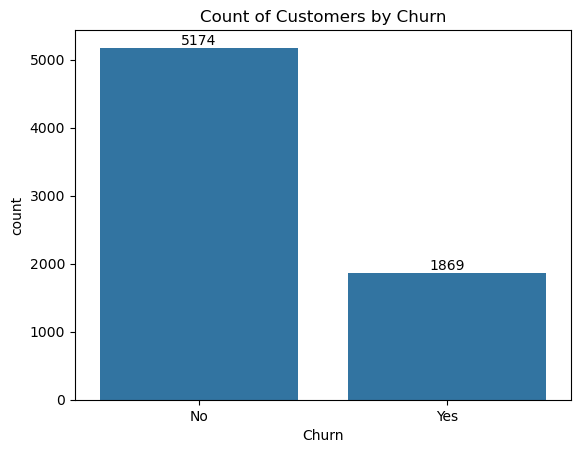

In [54]:
ax = sns.countplot(x='Churn' ,data=df)


ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [11]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


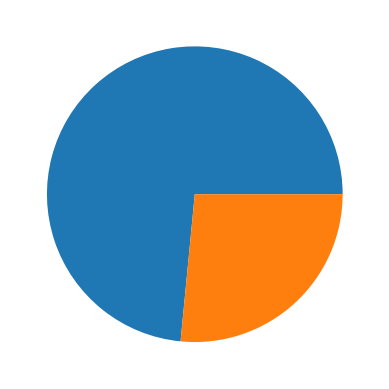

In [12]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'])
plt.show()

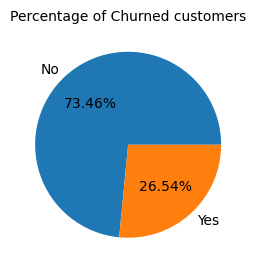

In [56]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index , autopct = "%1.2f%%")
plt.titlec, fontsize=10)
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out. now let's explore the reason behind it

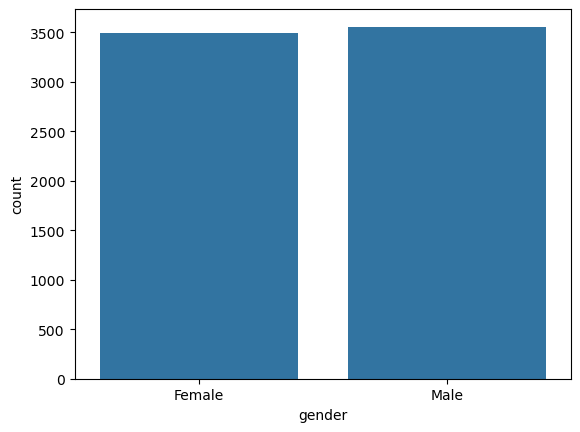

In [14]:
sns.countplot(x= "gender" , data=df)
plt.show()

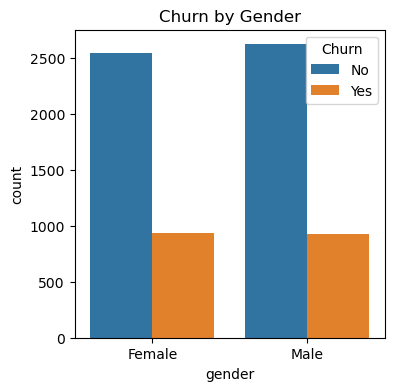

In [59]:
plt.figure(figsize=(4,4))
sns.countplot(x= "gender" , data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

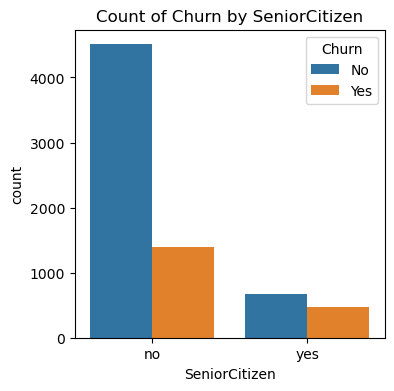

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x= "SeniorCitizen" , data=df, hue="Churn")
plt.title("Count of Churn by SeniorCitizen")
plt.show()

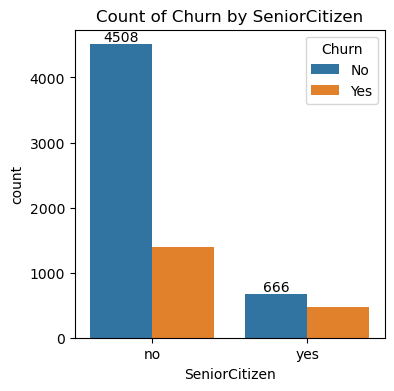

In [68]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x= "SeniorCitizen" , data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Churn by SeniorCitizen")
plt.show()

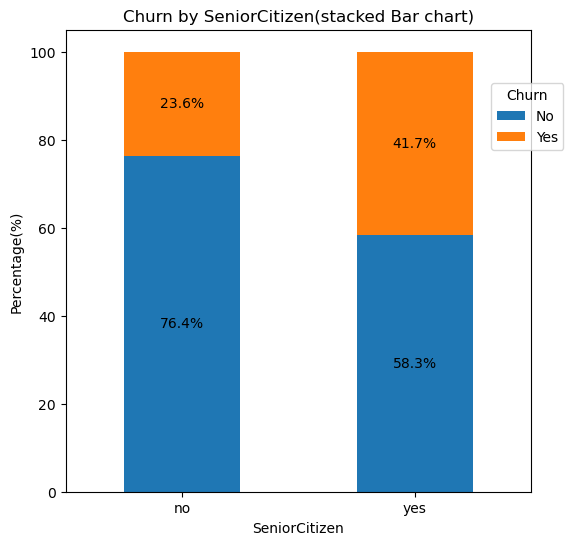

In [61]:
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
#plot 
fig, ax=plt.subplots(figsize=(6,6))

# Plot the bars

total_counts.plot(kind='bar',stacked=True, ax=ax, color=['#1f77b4','#ff7f0e'])

# Add percentage Lables on the bars

for p in ax.patches:
    width, height =p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by SeniorCitizen(stacked Bar chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9, 0.9)) #cutomize legend location

plt.show()


# comparative a greater percentage of people in senior citizen category have churned

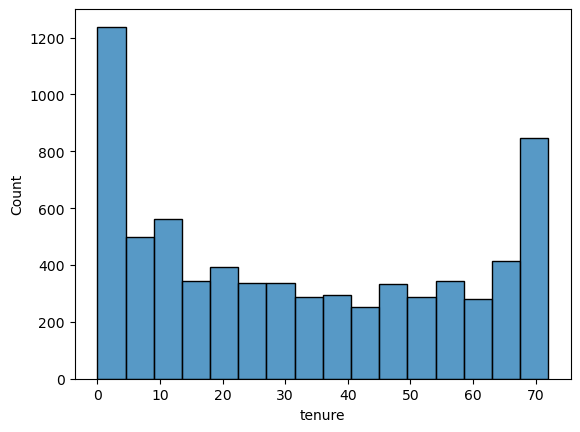

In [16]:
sns.histplot(x= "tenure", data=df)
plt.show()

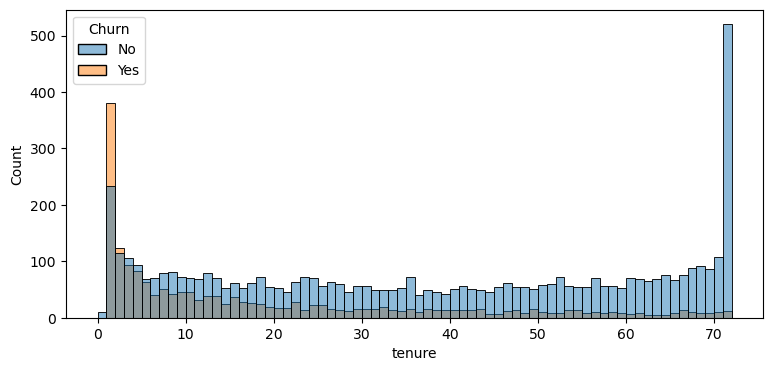

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure", data=df, bins=72, hue="Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

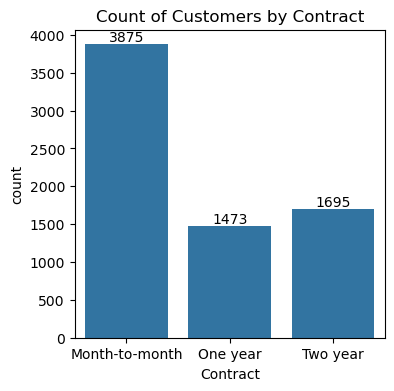

In [19]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="Contract" ,data=df)


ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

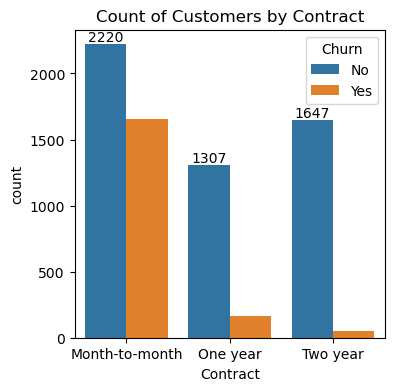

In [20]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="Contract" ,data=df, hue="Churn")


ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# People who have month-to-month contract are likely to churn then from those who have 1 or 2 years or contract.

In [65]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

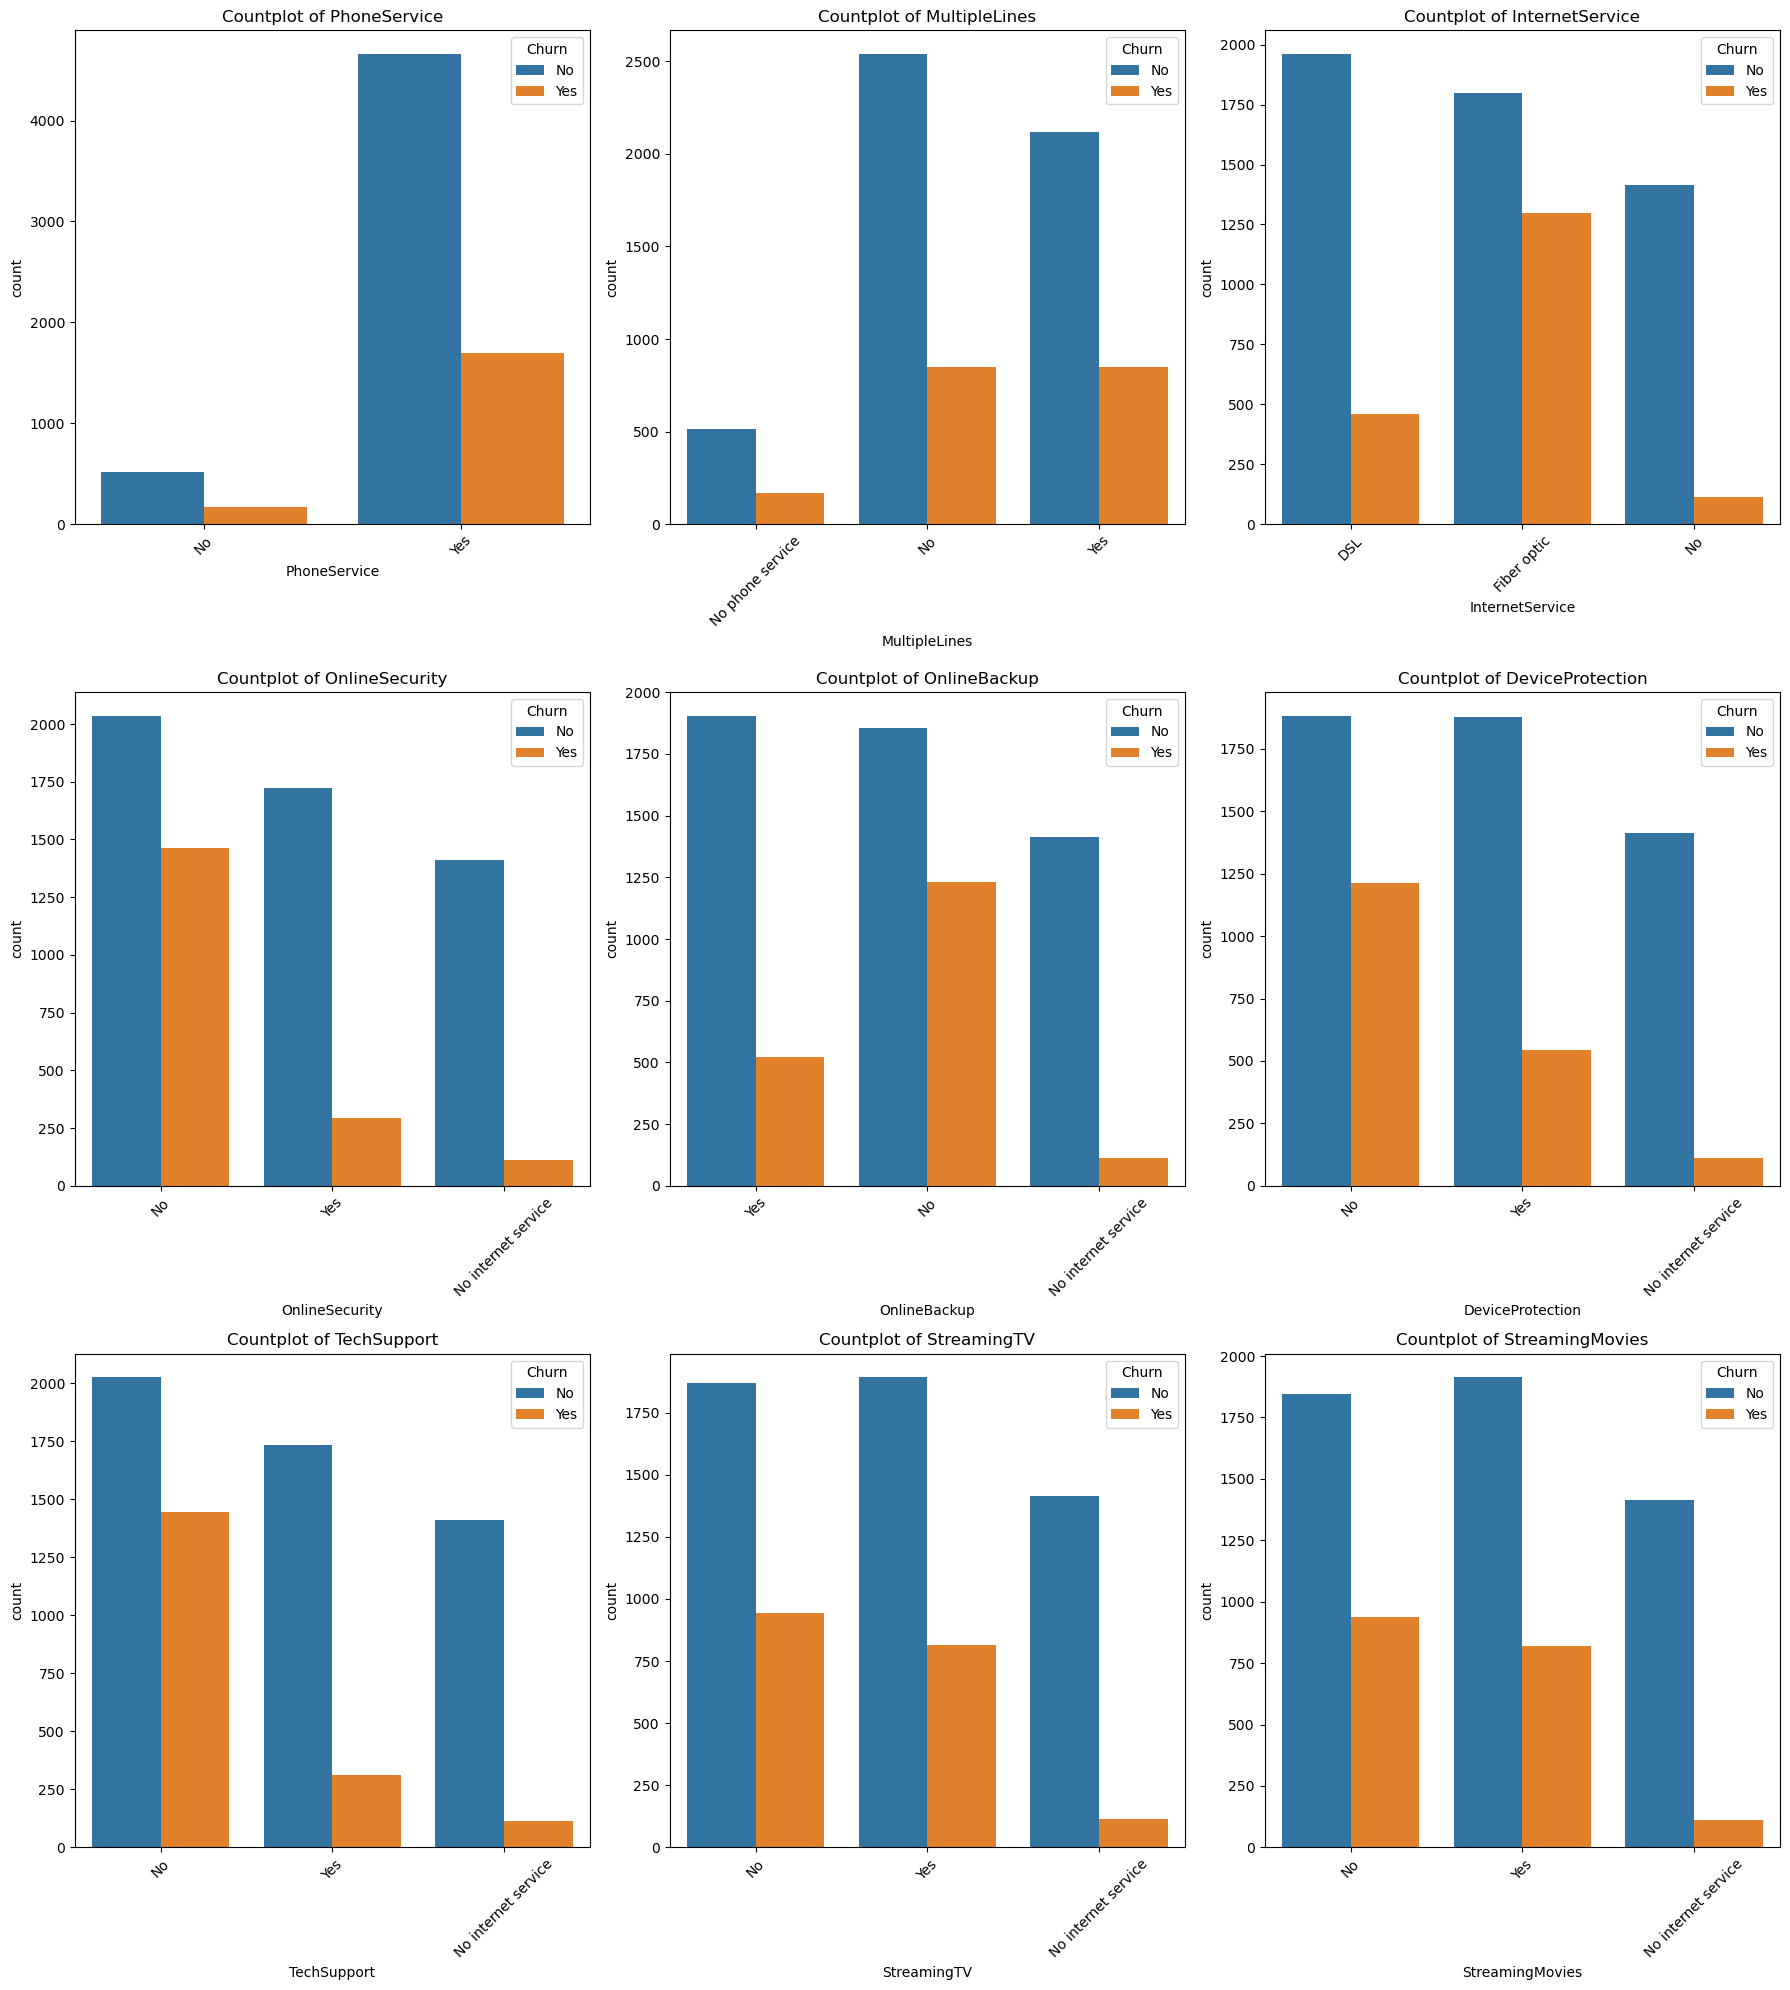

In [67]:


cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


plt.figure(figsize=(18, 20))  # Adjust size for clarity

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)   # 3 rows × 3 columns
    sns.countplot(data=df, x=col, hue=df["Churn"])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# The countplots show that customers without extra services (like OnlineSecurity, TechSupport, and OnlineBackup) tend to have higher churn rates. Services such as InternetService (especially Fiber Optic) also have more churn compared to DSL. For most value-added services (StreamingTV, DeviceProtection, etc.), customers using these services generally churn less, indicating these add-ons improve retention. Overall, fewer services = higher churn.

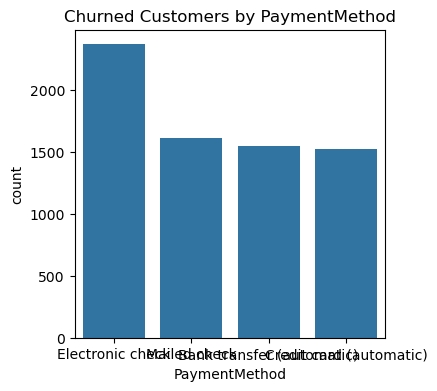

In [22]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="PaymentMethod" ,data=df)
plt.title("Churned Customers by PaymentMethod")
plt.show()


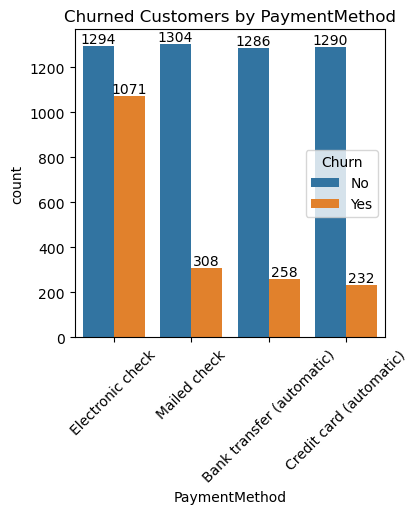

In [72]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="PaymentMethod" ,data=df, hue="Churn")


ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod")
plt.xticks(rotation=45)
plt.show()
